##  Manual Gradient

In [3]:
import numpy as np
import pdb
import torch
import matplotlib.pyplot as plt
%matplotlib inline
RSEED = 100

/Users/hjsong/Playground/Tutorials/PyTorchZeroToAll/Notebooks


### Example 1

In [8]:
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]
alpha = 0.01 # learning rate

w = 1.0 # initial guess

# Model
def forward(x):
    return x*w

def loss(x,y):
    y_pred = forward(x)
    return 0.5*(y_pred - y)**2

def gradient(x, y):
    # compute d_loss / dw (note wrt w)
    return (x*w - y)*x

#Before training prediction:
print("Untrained model prediction: ", forward(4))

#Training
for epoch in range(20):
    for x, y in zip(x_data, y_data):
        l = loss(x,y)
        grad = gradient(x, y)
        w = w - alpha * grad
        print(f"\tx: {x}, y: {y}, grad: {round(grad,2)}")
        print(f"\tnew weight: ", round(w,2) )
        print("\n")
    print ("Epoch: ", epoch, " w: ", round(w,2), "loss = ", round(l,2) )

#After training, prediction
print("Trained model prediction: ", forward(4))

Untrained model prediction:  4.0
	x: 1.0, y: 2.0, grad: -1.0
	new weight:  1.01


	x: 2.0, y: 4.0, grad: -3.96
	new weight:  1.05


	x: 3.0, y: 6.0, grad: -8.55
	new weight:  1.14


Epoch:  0  w:  1.14 loss =  4.06
	x: 1.0, y: 2.0, grad: -0.86
	new weight:  1.14


	x: 2.0, y: 4.0, grad: -3.42
	new weight:  1.18


	x: 3.0, y: 6.0, grad: -7.4
	new weight:  1.25


Epoch:  1  w:  1.25 loss =  3.04
	x: 1.0, y: 2.0, grad: -0.75
	new weight:  1.26


	x: 2.0, y: 4.0, grad: -2.96
	new weight:  1.29


	x: 3.0, y: 6.0, grad: -6.4
	new weight:  1.35


Epoch:  2  w:  1.35 loss =  2.27
	x: 1.0, y: 2.0, grad: -0.65
	new weight:  1.36


	x: 2.0, y: 4.0, grad: -2.56
	new weight:  1.39


	x: 3.0, y: 6.0, grad: -5.53
	new weight:  1.44


Epoch:  3  w:  1.44 loss =  1.7
	x: 1.0, y: 2.0, grad: -0.56
	new weight:  1.45


	x: 2.0, y: 4.0, grad: -2.22
	new weight:  1.47


	x: 3.0, y: 6.0, grad: -4.79
	new weight:  1.52


Epoch:  4  w:  1.52 loss =  1.27
	x: 1.0, y: 2.0, grad: -0.48
	new weight:  1.52


	x: 2.

Exercise 3-1
$$\frac{\partial loss}{\partial w1} = (y - y_{hat}) x$$
$$\frac{\partial loss}{\partial w2} = (y - y_{hat}) x^{2}$$
$$\frac{\partial loss}{\partial b} = (y - y_{hat})$$

### Exercise 3-2: Implement

In [9]:
def getX(n):
    """ 
    Creates nx2 data matrix for Exercise 3-2
    """
    X = np.zeros((n,2))
    X[:,0] = np.linspace(-10, 10, num=n)
    X[:,1] = X[:,0]**2
    return X

def getY(X, true_w, true_b):
    """ 
    Creates nx1 matrix for target of X
    with true weights, w = [w1, w2] and b
    """
    w = np.r_[true_b, true_w]
    X = np.c_[np.ones((X.shape[0], 1)), X]
    return np.dot(X, w).reshape((X.shape[0],-1))    

Implement with numpy

In [10]:
def forward(x, w, b):
    """
    x = [x1, x2] = [x, x^2]
    w = [w1, w2]
    Returns a scalar value of y_hat
    """
    return np.dot(x, w) + b

def loss(x, y, w, b):
    """
    x: an input vector in R^d, or (nxd) matrix
    y: a scalar (target value), or a vector of length n
    w: a weight vector in R^d
    b: a scalar bias term
    """
    y_hat = forward(x, w, b)
    return .5*(y-y_hat)**2

def dldw1(x,y,w,b):
    return -x[0]*(y - forward(x,w,b))
def dldw2(x,y,w,b):
    return -x[1]*(y - forward(x,w,b))

# Better to consider the gradient vector
def dldw(x,y,w,b):
    # Return [dl/dw1, dl/dw2]
    return -x*(y - forward(x,w,b))

def dldb(x,y,w,b):
    return -(y - forward(x,w,b))   

Alternatively using Tensors

In [11]:
# def forward(x, w, b):
#     """
#     x = [x1, x2] = [x, x^2]
#     w = [w1, w2]
#     """
#     return torch.dot(x, w) + b

# def loss(x, y, w, b):
#     """
#     x: an input vector
#     y: a scalar (target value)
#     w: a weight vector
#     b: a scalar bias term
#     """
#     y_hat = forward(x, w, b)
#     return .5*(y-y_hat)**2

# def dldw1(x,y,w,b):
#     """
#     Same input arguments as the loss function above
#     """
#     return (y - forward(x,w,b))*x[0]
# def dldw2(x,y,w,b):
#     """
#     Same input arguments as the loss function
#     """
#     return (y - forward(x,w,b))*x[1]

# # Better to consider the gradient vector
# def dldw(x,y,w,b):
#     """
#     Return [dl/dw1, dl/dw2]
#     """
#     return torch.mul(x, (y - forward(x,w,b)))

# def dldb(x,y,w,b):
#     return (y - forward(x,w,b))   

Gradient checking functions

In [12]:
def estimate_pdev(func, x, step=1e-6):
    """estimate partial derivative of func wrt x 
    using the centered finite difference method"""
    return (func(x+step) - func(x-step))/(2*step)

def estimate_grad(func, x, step=1e-5):
    """estimate gradient [vector] of func evaluated at x 
    using the centered finite difference method.
    - func: takes x as the argument
    - x: a list of arguments"""
    x = np.array(x)
    grad = []
#     pdb.set_trace()
    for i,xi in enumerate(x):
        dx = np.zeros_like(x, dtype=np.float)
        dx[i] = step
        grad.append( (func(*(x+dx)) - func(*(x-dx)))/(2*step) )
    return grad
def test_estimate_grad():
    f = lambda x: x**2
    print(estimate_grad(f, [1.0]))
    
def test_estimate_grad_two_vars():
    f = lambda x,y: x+y**2
    print (estimate_grad(f, [1.0, 2.0]))

In [13]:
test_estimate_grad()
test_estimate_grad_two_vars()

[2.000000000002]
[0.9999999999621422, 4.000000000026205]


In [14]:
# Get X,Y data
n = 100
true_w = [1,1]; true_b = [5]

X = getX(n)
Y = getY(X, true_w, true_b)

In [ ]:
# Initial weights
w = np.array([0.1, 0.1])
b = np.array([0.1])
alpha = 1e-6 #learning rate
verbose = False
# Training
ls = []
f, ax = plt.subplots()
for epoch in range(2000):
    for x_val, y_val in zip(X, Y):
#         pdb.set_trace()
        if verbose:
            print("current x,y: ", x_val, y_val)
            print("current weights: ", w, b)
            print(f"y_hat: {forward(x_val, w, b)}")
            print("grad: ", dldw(x_val, y_val, w, b))
        l = loss(x_val, y_val, w, b)
        ls.append(l)
        
        # Gradient checking
        grad_w = dldw(x_val, y_val, w, b)
        grad_b = dldb(x_val, y_val, w, b)
        grad = estimate_grad(loss, [x_val, y_val, w, b])
        
        if verbose:
            print(f"dl/db: {grad_b} vs {grad[-1]}")
        
        dw = alpha*dldw(x_val, y_val, w, b)
        db = alpha*dldb(x_val, y_val, w, b)
        ax.arrow(w[0], w[1], dw[0], dw[1]) 
        
        w = w - dw #update
        b = b - db
    
    if (epoch%100 == 0):
        print(f"Epoch: {epoch}")
        print(f"\tw,b: {w},{b}")
# plt.plot(ls)

Epoch: 0
	w,b: [0.10199167 0.28557771],[0.1032512]
Epoch: 100
	w,b: [0.35561756 1.08303285],[0.13835565]
Epoch: 200
	w,b: [0.5392937  1.08162733],[0.16019976]
Epoch: 300
	w,b: [0.66996339 1.08052747],[0.18186425]
Epoch: 400
	w,b: [0.76292648 1.07964548],[0.20337381]


In [ ]:
plt.plot(ls[180000:])


# Autograd

In [ ]:
# Create a tensor and set requires_grad = True to tack computations on it
x = torch.ones(2,2, requires_grad=True)
print(x)
print(x.data)
print(x.grad)
print(x.grad_fn)

In [ ]:
# Do an operation on it
y = x + 2
print(y)
print(y.grad)
print(y.grad_fn)

In [ ]:
# More operations on y
z = y*y*3
out = z.mean()
print(z)
print(out)

In [ ]:
# Backprop: dout/dx
out.backward()
print(x.grad)
print(x.grad.data)

In [ ]:
# Using autograd
w = Variable(torch.Tensor([1.0]), requires_grad=True)
alpha = 1e-3
verbose = False
# Model
def forward(x):
    return x*w

def loss(x, y):
    y_pred = forward(x)
    return 0.5*(y - y_pred)*(y - y_pred)

# Before training
print("Before training")
print(f"weight: {w}, prediction for 4 is {forward(4).data[0]}")

# Train
print("="*20)
for epoch in range(1000):
    for x_val, y_val in zip(x_data, y_data):
        l = loss(x_val, y_val)
        if verbose: 
            print(f"w: {w.data[0]}")
        l.backward()
        if verbose: 
            print(f"grad_w: {w.grad.data[0]}")
        w.data = w.data - alpha*w.grad.data
        
        # Manually zeros the gradients after updating weights 
        w.grad.data.zero_()
    if (epoch%10 == 0):
        print(f"\nEpoch {epoch}: {l.data[0]}")
print("="*20)

print("After training")
print(f"weight: {w}, prediction for {4}  is {forward(4).data[0]}")    

Linear regression in PyTorch way


Three rhythms of pytorch
1. Design the model using PyTorch API
2. Construct loss and optimizer (select from PyTorch API)
3. Training cycle (forward, backward, update)

In [2]:
# Data as torch.tensor objects
x_data = torch.tensor([[1],[2],[3]], dtype=torch.float)
y_data = torch.tensor([[2],[4],[6]], dtype=torch.float)

In [15]:
# Step1: design the model by extending torch.nn.Module
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(1,1) # One input and one output
    
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

    def print_params(self):
        for p in model.parameters():
            print(p)

In [16]:
# our model
model = Model()
# Default Initial parameters
model.print_params()

Parameter containing:
tensor([[-0.7767]])
Parameter containing:
tensor([ 0.6317])


In [45]:
# Define initialization function for linear modules
def init_weight(m):
    if isinstance(m, torch.nn.Linear):
        m.weight.data.fill_(0.1)
        m.bias.data.fill_(0.1)
#         print(m.weight.data, m.bias.data.item())

In [46]:
model.apply(init_weight)
model.print_params()

Parameter containing:
tensor([[ 0.1000]])
Parameter containing:
tensor([ 0.1000])


In [47]:
# To have the same random weights for each initialization, manually set the seed
# torch.manual_seed(RSEED)

In [49]:
# Check if it works
for i in range(10):
    model = Model()
    model.apply(init_weight)
    model.print_params()

Parameter containing:
tensor([[ 0.1000]])
Parameter containing:
tensor([ 0.1000])
Parameter containing:
tensor([[ 0.1000]])
Parameter containing:
tensor([ 0.1000])
Parameter containing:
tensor([[ 0.1000]])
Parameter containing:
tensor([ 0.1000])
Parameter containing:
tensor([[ 0.1000]])
Parameter containing:
tensor([ 0.1000])
Parameter containing:
tensor([[ 0.1000]])
Parameter containing:
tensor([ 0.1000])
Parameter containing:
tensor([[ 0.1000]])
Parameter containing:
tensor([ 0.1000])
Parameter containing:
tensor([[ 0.1000]])
Parameter containing:
tensor([ 0.1000])
Parameter containing:
tensor([[ 0.1000]])
Parameter containing:
tensor([ 0.1000])
Parameter containing:
tensor([[ 0.1000]])
Parameter containing:
tensor([ 0.1000])
Parameter containing:
tensor([[ 0.1000]])
Parameter containing:
tensor([ 0.1000])


In [50]:
# Hyperparams
alpha = 1e-5

In [51]:
# Step2: Construct loss and optimizer
criterion = torch.nn.MSELoss(size_average=False) # we update on every data point

In [5]:
# This is exactly a wrong way to create opimizer objects.
# Create it by passing the right, consistent model.parameters()
# hmm or is it really wrong? The model is currently untrained.
sgd = torch.optim.SGD(model.parameters(), lr=alpha)
adagrad = torch.optim.Adagrad(model.parameters(), lr=alpha)
rmsprop = torch.optim.RMSprop(model.parameters(), lr=alpha)
adam = torch.optim.Adam(model.parameters(), lr=alpha)

NameError: name 'alpha' is not defined

Q: How does torch.optim object access the passed-in model.parameters() and eventually updates them?   
A: Python dictionary's value accessor (ex. `val = myDic[keyname]` returns a reference to myDic[keyname]. The optim instance created with the model.parameters() stores the references to the model's parameters (of type tensor) at initialization, and is able to update the paramters.  All thanks to referencing. See [source](https://pytorch.org/docs/stable/_modules/torch/optim/optimizer.html#Optimizer).

Let's see a simple example using a dictionary.

In [ ]:
d = {'l1':[1,2,3], 'l2':[10,20,30], 'l3':['one','two']}; print(d)
val = d['l1']
val[0] = 0 #if val is a reference, d['l1'] will be updated
print(d['l1'])

Yes, indeed. 
This is how torch.optim stores the parameters passed as input (by reference) and  is able to update them.

In [8]:
y_pred = model(x_data); print(y_pred); print(y_data);
print(criterion(y_pred, y_data))

tensor([[-0.4739],
        [-1.4451],
        [-2.4163]])
tensor([[ 2.],
        [ 4.],
        [ 6.]])
tensor(106.6031)


In [10]:
# check if criterion is making sense
torch.sum((y_pred - y_data)**2)

tensor(106.6031)

After training: predict 4, 8.000250816345215


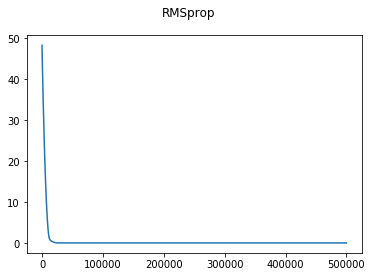

In [52]:
# Step3: Training loop. Forward, backward, update
# Reset Model to the untrained state
model = Model()
model.apply(init_weight)
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.0001)
f,ax = plt.subplots()
f.suptitle(optimizer.__class__.__name__)
losses = []
for epoch in range(500000):
    #forward
    y_pred = model(x_data) #vectorized for multiple data points 
    # Q: what is the difference between model(input) and model.forward(input)?
    # What does tht first command actually do?
    
    loss = criterion(y_pred, y_data) #summed up loss for a batch of (forwarded) data
    losses.append(loss.item())
    # Make sure gradients are currently zero/uncalculated, backward pass, update
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
ax.plot(losses)
# After training
print(f"After training: predict 4, {model(torch.tensor([[4.0]])).data.item()}")
    

Lesson:
1. torch.nn.Module's subclasses must have two functions: `__init__` and `forward(self, x)`
2. Get the prediction from the model by passing in 2dim torch.tensor (of float type) 
```python
yhat = model(torch.tensor([ [4] ] ))
```
    - torch.nn Class does not accept a single example. It only works with a *mini-batch* of examples. See [Ex1 Note](https://pytorch.org/tutorials/beginner/former_torchies/nn_tutorial.html#example-1-convnet). 
    - Tensor's dtype is important in any computation. Here if I had used torch.tensor([[4]]) rather than 4.0, it would have caused a type error in multiplication.
    - access data from tensor by `myTensor.data[i][j]`

3. Forwarded value is stored in model.data as a torch.tensor object.
If a tensor has scalar value, access it by `myTensor.item()`

4. Construct optimizer objects at the right time. That is, pass the to-be-optimized parameters of the right state. PyTorch documentation says: 
>In general, you should make sure that optimized parameters live in consistent locations when optimizers are constructed and used.

[READ](https://pytorch.org/docs/stable/optim.html)

### Exercise 5-1:Try different optimizers

lr: 0.0001
Optimizer: SGD
	After training: predict 4, 7.983757495880127
Optimizer: RMSprop
	After training: predict 4, 8.000248908996582
Optimizer: Adagrad
	After training: predict 4, 0.7215728163719177
Optimizer: Adadelta
	After training: predict 4, 1.6246352195739746
Optimizer: Adam
	After training: predict 4, 8.0


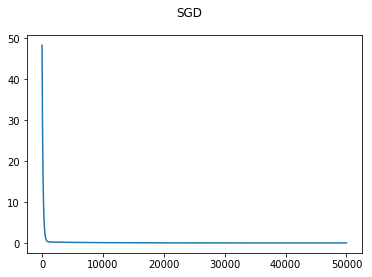

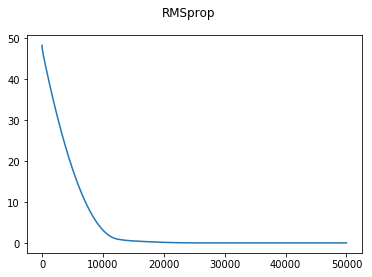

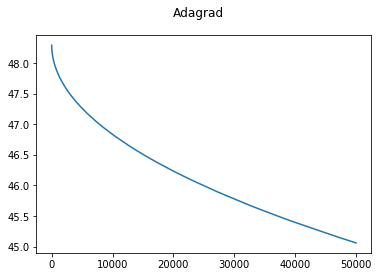

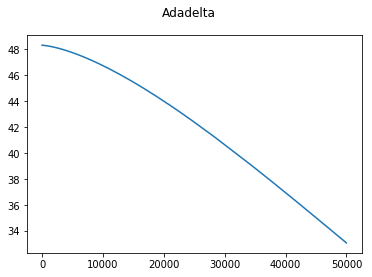

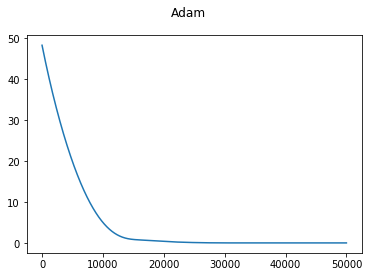

In [53]:
optim_funcs = [torch.optim.SGD, torch.optim.RMSprop, torch.optim.Adagrad, 
               torch.optim.Adadelta, torch.optim.Adam]
alpha = 0.0001
print(f"lr: {alpha}")
for optim_func in optim_funcs:
    f,ax = plt.subplots()
    f.suptitle(optim_func.__name__)
    print(f"Optimizer: {optim_func.__name__}")
    # Reset Model to the untrained state
    model = Model()
    model.apply(init_weight)
    optimizer = optim_func(model.parameters(), lr=alpha)
    losses = []
    for epoch in range(50000):
        #forward
        y_pred = model(x_data) #vectorized for multiple data points 
        loss = criterion(y_pred, y_data) #summed up loss for a batch of (forwarded) data
        losses.append(loss.item())
        # Make sure gradients are currently zero/uncalculated, backward pass, update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    ax.plot(losses)
    # After training
    print(f"\tAfter training: predict 4, {model(torch.tensor([[4.0]])).data.item()}")


TODO: read adadelta paper. summarize the difference between adam vs adagrad and adadelta

Summary
1. SGD actually does a good job. Adam seems to be a little bit better than RMSprop at the end of 50000 epochs. Maybe start with SGD and then switch off the Adam when the loss starts to plateau will be the best of both.


TODO: Try different initial weights. 

TODO:     
[ ] Try different datasize.   
[ ] Try slightly more complex datasets (2 weights, 1 bias).       
[ ] Try non-linearly-separable dataset. Try noisy dataset.    


In [56]:
import ipywidgets as widgets

widgets.Checkbox(
    value=False,
    description='Check me',
    disabled=False
)


Checkbox(value=False, description='Check me')